# Lab Assignment 2



### Yifang Qin, s2184037

## Presentation and coding style (3 marks)

In this assignment, some marks are allocated to your coding style and presentation. Try to make your code more readable using the tips given in your computer lab 2. Make sure your figures have good quality, right size, good range and proper labels.

## Task 1 (4 marks)

In this task we try to use several method from Lab 2 to solve the initial value problem 

\begin{equation}
y' = 4t-3y, \quad y(0)=1,
\end{equation}

Set the step size to $h = 0.05$ and numerically solve this ODE from $t=0$ to $0.5$ using the following methods:

- Forward Euler 

- Adams–Bashforth order 2

- Adams–Bashforth order 3 (we did not code this method in the computer lab, but you can find the formula on [this wikipedia page](https://en.wikipedia.org/wiki/Linear_multistep_method)). For this method, you need to build the very first two steps using other methods. For the first step, use the Euler scheme. For the second step, use Adams–Bashforth order 2. 


Plot the three different approximations, and display the values in a table.

In [13]:
# Import packages
import math
import numpy as np
import matplotlib.pyplot as plt
import math


#  defining the function in the RHS of the ODE given in the question
# Euler scheme
def ode_Euler(func, times, y0):
    '''
    integrates the system of y' = func(y, t) using forward Euler method
    for the time steps in times and given initial condition y0
    ----------------------------------------------------------
    inputs:
        func: the RHS function in the system of ODE
        times: the points in time (or the span of independent variable in ODE)
        y0: initial condition (make sure the dimension of y0 and func are the same)
    output:
        y: the solution of ODE. 
        Each row in the solution array y corresponds to a value returned in column vector t
    '''
    # guess why I put these two lines here?
    times = np.array(times)
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    nT = times.size   # the number of time steps 
    y = np.zeros([nT,n])
    y[0, :] = y0
    # loop for timesteps
    for k in range(nT-1):
        y[k+1, :] = y[k, :] + (times[k+1]-times[k])*func(y[k, :], times[k])
    return y


# Adams-Bashforth 2
def ode_AB2(func, initialTime, finalTime, nSteps, y0):
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    dt = (finalTime - initialTime)/nSteps
    times = np.linspace(initialTime, finalTime, nSteps + 1)
    y = np.zeros([nSteps + 1, n])
    y[0,:] = y0
    # First step using Euler
    y[1,:] = y[0,:] + dt*func(y[0, :], times[0])
    # Other steps
    for k in range(1, nSteps):
        y[k+1,:] = y[k,:] + (1.5*func(y[k, :], times[k])-0.5*func(y[k-1, :], times[k-1]))*dt
        
    return y, times 


# Adams-Bashforth 3 
def ode_AB3(func, initialTime, finalTime, nSteps, y0):
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    dt = (finalTime - initialTime)/nSteps
    times = np.linspace(initialTime, finalTime, nSteps + 1)
    y = np.zeros([nSteps + 1, n])
    y[0,:] = y0
    # First two steps using Euler
    y[1,:] = y[0,:] + dt*func(y[0, :], times[0])
    y[2,:] = y[1,:] + (1.5*func(y[1, :], times[1])-0.5*func(y[0, :], times[0]))*dt
    # Other steps
    for k in range(2, nSteps):
        y[k+1,:] = y[k,:] + (dt/12.0)*(23.0*func(y[k,:],times[k])-16.0*func(y[k-1,:],times[k-1])+5.0*func(y[k-2,:],times[k-2]))
        
    return y, times 


# function  
def eq_dy_dt(y,t):
    return 4*t-3*y

def timesteps(start, stop, h):
    num_steps = math.ceil((stop - start)/h)
    return np.linspace(start, start+num_steps*h, num_steps+1)

def Euler_step(func, start, stop, h, ics):
    times = timesteps(start, stop, h)
    values = ode_Euler(func, times, ics)
    return values, times

def AB2_step(func, start, stop, h, ics):
    nSteps = math.ceil((stop - start)/h)
    values, times = ode_AB2(func, start, stop, nSteps, ics)
    return values, times

def AB3_step(func, start, stop, h, ics):
    nSteps = math.ceil((stop - start)/h)
    values, times = ode_AB3(func, start, stop, nSteps, ics)
    return values, times


Text(0, 0.5, 'y')

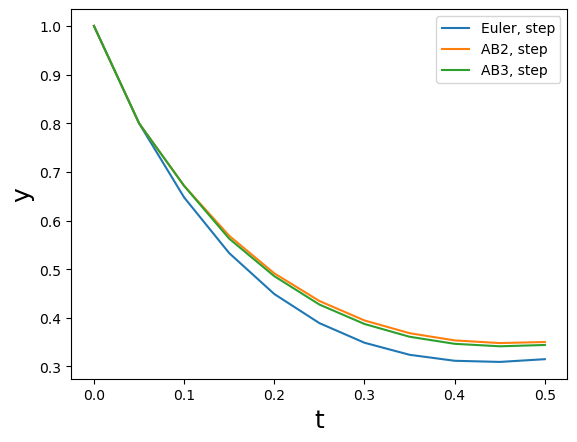

In [9]:
from pandas import DataFrame
# plot the results
def produce_df(method, vectorField, start, stop, h, ics, custom_heading = None):
    values, times = method(vectorField, start, stop, h, ics)
    if custom_heading is None:
        col_heading = "h="+str(h)
    else:
        col_heading = custom_heading
    return DataFrame(data = values, index = np.round(times, 3), columns = [col_heading])

df1 = produce_df(Euler_step, eq_dy_dt, 0, 0.5, 0.05, 1, "Euler, step")
df2 = produce_df(AB2_step, eq_dy_dt, 0, 0.5, 0.05, 1, "AB2, step")
df3 = produce_df(AB3_step, eq_dy_dt, 0, 0.5, 0.05, 1, "AB3, step")
df_eq = df1.join([df2, df3])
df_eq.filter(items=timesteps(0,0.5,0.05), axis=0)
df_eq.plot()
ax = plt.gca()
ax.set_xlabel('t',fontsize=18)
ax.set_ylabel('y',fontsize=18)

In [5]:
# printing the solution in a table
table_solutions

,Euler_step,AB2_step,AB3_step
0.00,1.000000,1.000000,1.000000
0.05,0.850000,0.850000,0.850000
0.10,0.732500,0.748750,0.748750
0.15,0.642625,0.669031,0.665984
0.20,0.576231,0.609655,0.606139
0.25,0.529797,0.567660,0.563274
0.30,0.500327,0.540661,0.535936
0.35,0.485278,0.526587,0.521626
0.40,0.482486,0.523654,0.518641
0.45,0.490113,0.530326,0.525361


## Task 2 (3 marks)

Use `SymPy` to solve the differential equation $y' = 4t-3y$, with $y(0)=1$, present the analytical solution. What is the value $y(0.5)$? Also, find the value of $t=t_{m}$ where $y(t)$ achieves a minimum value. What is the value of $y_{m} = y(t_{m})$?

Compare the result with the approximations from the three methods in Task 1. You may use a table to show the results of each method at $y(0.5)$ and $y_{m}$. Which method is the most/least accurate? Why?

In [36]:
# standard setup
import sympy as sym
sym.init_printing()
from IPython.display import display_latex
import sympy.plotting as sym_plot

# Solve the equation 
t = sym.symbols('t')
y = sym.Function('y')
eq = sym.Eq(y(t).diff(t), 4*t-3*y(t))
print("The equation")
display_latex(eq)

eq_sol = sym.dsolve(eq, y(t), ics={y(0):1})
print("has solutions")
display_latex(eq_sol)
 
C1_value = sym.solve(initial_condition)[0]
y_exact = solution.subs({"C1": C1_value})
y_at_05 = y_exact.rhs.subs(t, 0.5)
print(f"Value of y at t=0.5: {y_at_05}")

# Find the real critical points and choose the first one
y_prime = y_exact.rhs.diff(t)
critical_points = sym.solve(y_prime, t)

real_critical_points = [cp for cp in critical_points if cp.is_real]
t_m = real_critical_points[0]
y_m = y_exact.rhs.subs(t, t_m)
print(f"Minimum occurs at t={t_m.evalf()} with y={y_m.evalf()}")

The equation


has solutions


Value of y at t=0.5: 0.544521342436621
Minimum occurs at t=0.392884998780549 with y=0.523846665040732


In [25]:
def eq_exact(t):
    return 4/3*t-4/9+13*np.exp(-3*t)/9

df1 = produce_df(Euler_step, eq_dy_dt, 0, 0.5, 0.05, 1, "Euler, h=0.05")
df2 = produce_df(AB2_step, eq_dy_dt, 0, 0.5, 0.05, 1, "AB2, h=0.05")
df3 = produce_df(AB3_step, eq_dy_dt, 0, 0.5, 0.05, 1, "AB3, h=0.05")
df_eq2 = df1.join([df2, df3])
df_eq2["Exact"] = DataFrame(data = [eq_exact(t) for t in timesteps(0,0.5,0.05)],
                            index = np.round(timesteps(0,0.5,0.05),3))
df_eq2

,"Euler, h=0.05","AB2, h=0.05","AB3, h=0.05",Exact
0.00,1.000000,1.000000,1.000000,1.000000
0.05,0.850000,0.850000,0.850000,0.865467
0.10,0.732500,0.748750,0.748750,0.758960
0.15,0.642625,0.669031,0.665984,0.676574
0.20,0.576231,0.609655,0.606139,0.614950
0.25,0.529797,0.567660,0.563274,0.571196
0.30,0.500327,0.540661,0.535936,0.542823
0.35,0.485278,0.526587,0.521626,0.527688
0.40,0.482486,0.523654,0.518641,0.523947
0.45,0.490113,0.530326,0.525361,0.530014
